This is a undergoing project created by Zhou Shiming and Wang Jun which is simply driven by the interests. Our main target is to predict the SalePrice with the provided data. The database is consitituted by three files. 
data_description ---> to give the concrete explanation of all variables.
train.csv ---> the original train data
test.csv ---> the testing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing

first go through all the datasets

In [2]:
train = pd.read_csv('../all/train.csv')
test = pd.read_csv('../all/test.csv')
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id',inplace = True,axis = 1)
test.drop('Id',inplace = True, axis = 1)
ntrain = train.shape[0]
ntest = test.shape[0]

In [3]:
train_and_test = pd.concat([train.loc[:, 'MSSubClass': 'SaleCondition'],  test.loc[:, 'MSSubClass': 'SaleCondition']], axis=0, ignore_index=True)

train_and_test['GarageYrBlt'] = 2018 - train_and_test['GarageYrBlt']
train_and_test['YearBuilt'] = 2018 - train_and_test['YearBuilt']
train['GarageYrBlt'] = 2018 - train['GarageYrBlt']
train['YearBuilt'] = 2018 - train['YearBuilt']

In [4]:
replace_subclass = {20:'Class-A',30:'Class-B',40:'Class-C',45:'Class-D',50:'Class-E',60:'Class-F',70:'Class-G',75:'Class-H',80:'Class-I',85:'Class-J',90:'Class-K',120:'Class-L',150:'Class-M',160:'Class-N',180:'Class-O',190:'Class-P'}
train_and_test['MSSubClass'].replace(replace_subclass,inplace = True)
train['MSSubClass'].replace(replace_subclass,inplace = True)

In [5]:
def count_nan(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] != 0.0]
count_nan(train)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [6]:
train.drop(['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu', 'LotFrontage'],inplace = True,axis=1)

In [7]:
train['GarageCond'].fillna('No_garage', inplace = True)
train['GarageFinish'].fillna('No_garage', inplace = True)
train['GarageQual'].fillna('No_garage', inplace = True)
train['GarageType'].fillna('No_garage', inplace = True)
train['GarageYrBlt'].fillna(0, inplace = True)
train['BsmtFinType2'].fillna('No_bsmt',inplace = True)
train['BsmtExposure'].fillna('No_bsmt',inplace = True)
train['BsmtCond'].fillna('No_bsmt',inplace = True)
train['BsmtQual'].fillna('No_bsmt',inplace = True)
train['BsmtFinType1'].fillna('No_bsmt',inplace = True)
train['MasVnrType'].fillna('None',inplace = True)
train['MasVnrArea'].fillna(0,inplace = True)
train['Electrical'].fillna('SBrkr',inplace = True)

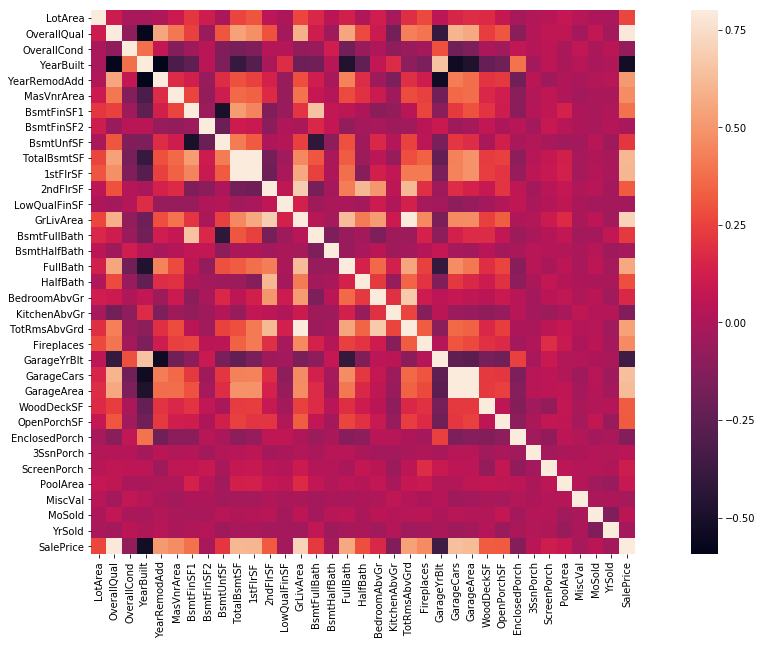

In [8]:
corrmat = train.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

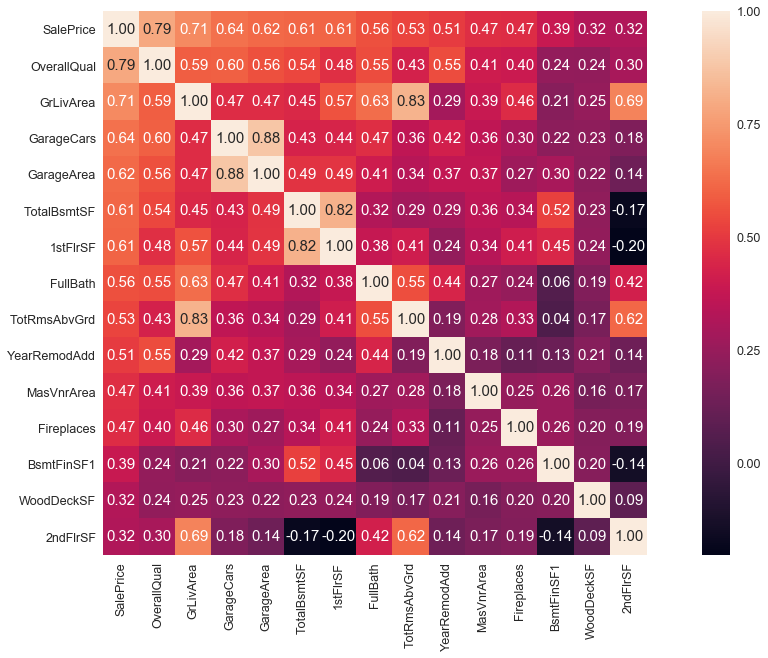

In [9]:
cols = corrmat.nlargest(n=15, columns='SalePrice').index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)

In [10]:
train_and_test = train_and_test.drop('GarageArea', axis=1) 
train_and_test = train_and_test.drop('1stFlrSF', axis=1) 
train_and_test = train_and_test.drop('TotRmsAbvGrd', axis=1)

In [11]:
def count_nan(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] != 0.0]
count_nan(train_and_test)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [12]:
print(count_nan(train_and_test).index.intersection(cols))

Index(['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageCars'], dtype='object')


In [13]:
train_and_test['MasVnrArea'].fillna(0, inplace=True)
train_and_test['BsmtFinSF1'].fillna(train_and_test['BsmtFinSF1'].mean(), inplace=True)
train_and_test['TotalBsmtSF'].fillna(train_and_test['TotalBsmtSF'].mean(), inplace=True)
train_and_test['GarageCars'].fillna(train_and_test['GarageCars'].mean(), inplace=True)

In [14]:
#train_and_test.drop(['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu', 'LotFrontage'],inplace = True,axis=1)
cols_fill = list(count_nan(train_and_test).index)
train_and_test.drop(cols_fill, inplace=True, axis=1)

In [15]:
count_nan(train_and_test)

,Total,Percent


In [16]:
train_and_test.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,Class-F,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,2,2008,Normal
1,Class-A,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,0,5,2007,Normal
2,Class-F,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,9,2008,Normal
3,Class-G,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,2,2006,Abnorml
4,Class-F,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,12,2008,Normal


one-hot 去共线性

In [44]:
train_and_test = pd.get_dummies(train_and_test)

corrmat = train_and_test.corr()
droplist = []
n_col = len(corrmat.columns)
n_row = len(corrmat.index)
for i in range(n_col):
    for j in range(n_row):
        x = corrmat.iloc[j, i]
        idx = corrmat.index[j]
        cln = corrmat.columns[i]
        if np.abs(x) > 0.8 and idx != cln:
            print(idx, cln, x)
            droplist.append(idx)
train_and_test.drop(droplist, inplace=True, axis=1)

拆回去

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in train_and_test.columns:
    if train_and_test[col].dtype == 'object':
        train_and_test[col] = LabelEncoder().fit_transform(list(train_and_test[col].values))

In [45]:
X = train_and_test[:ntrain]
y = train['SalePrice']
test = train_and_test[ntrain:]

In [46]:
def extract_numerical_features(df):
        df = df.copy()
        # Identify numerical columns which are of type object
        numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

        for feature in df.columns:
            if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                            any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                            (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
                numerical_features[feature] = 1
        return numerical_features[numerical_features == 1].index
train[extract_numerical_features(train)].head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,8450,7,5,15,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,9600,6,8,42,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,11250,7,5,17,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,9550,7,5,103,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,14260,8,5,18,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


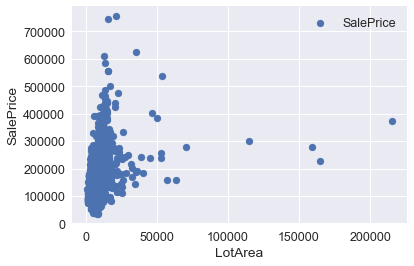

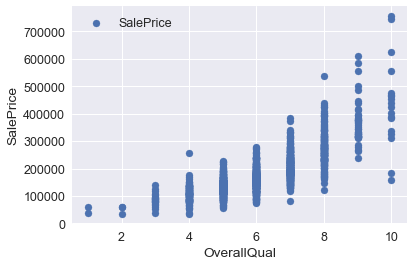

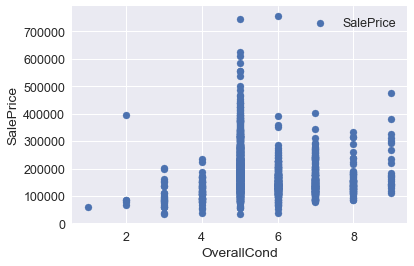

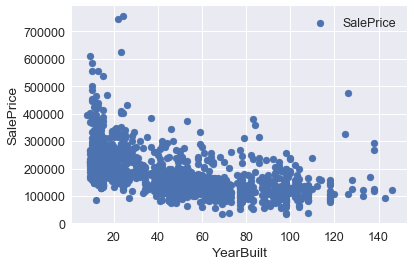

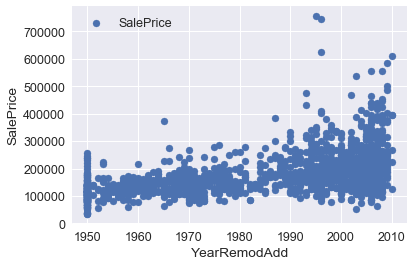

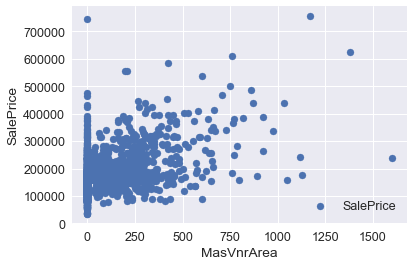

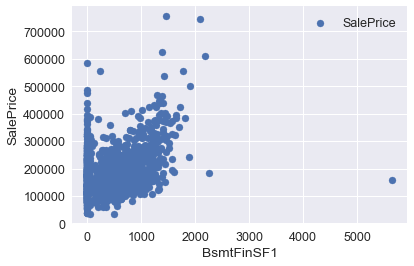

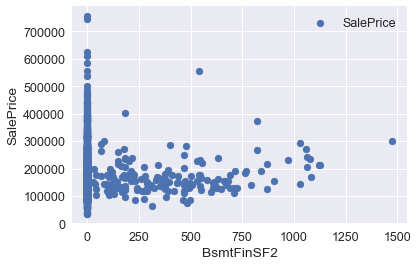

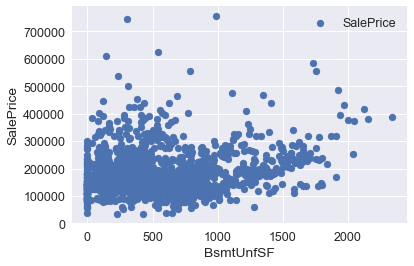

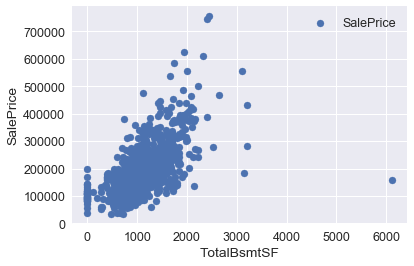

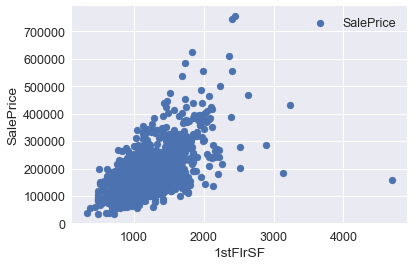

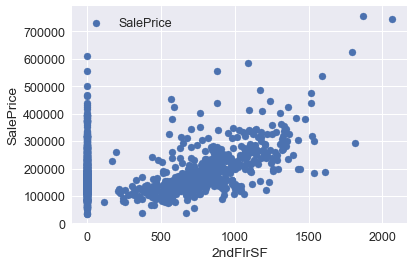

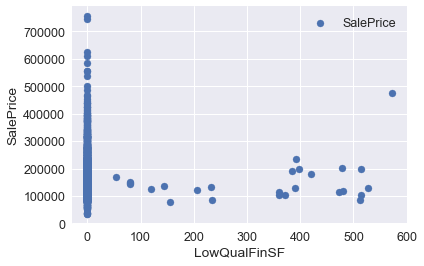

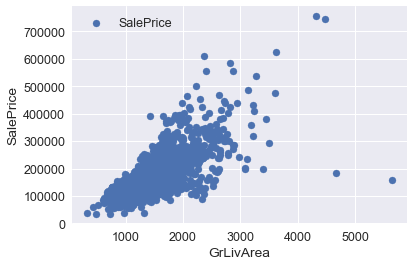

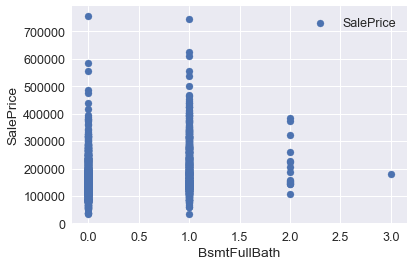

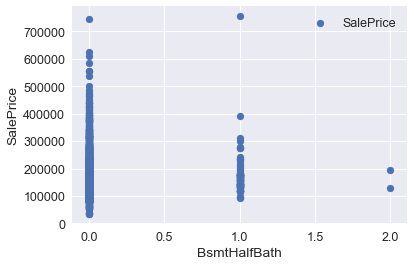

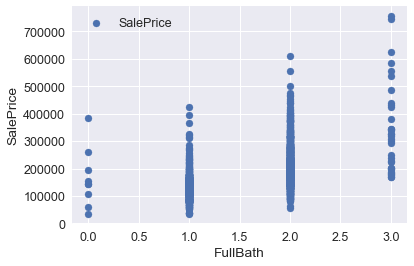

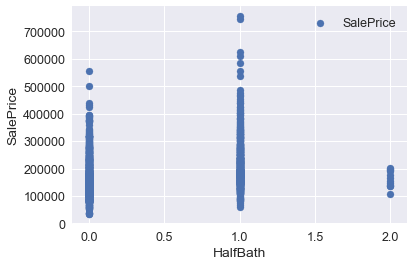

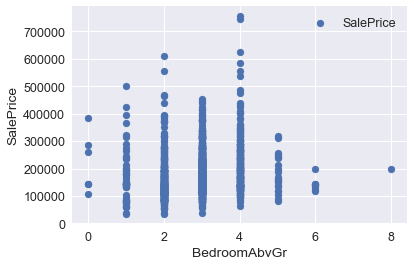

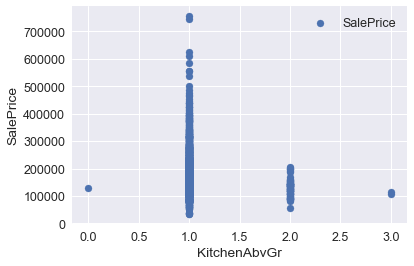

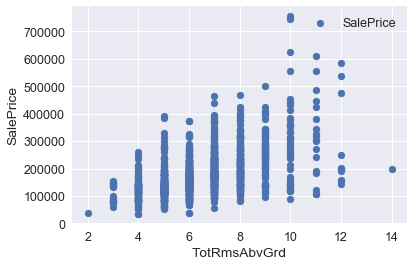

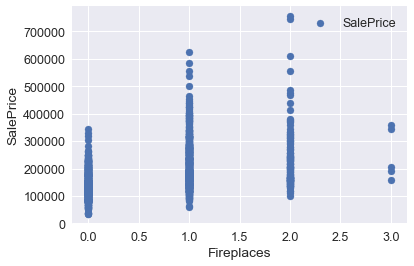

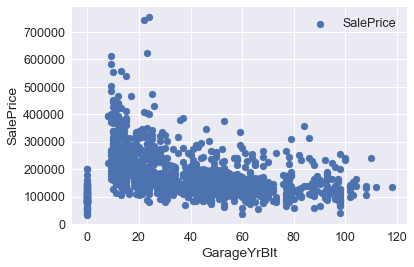

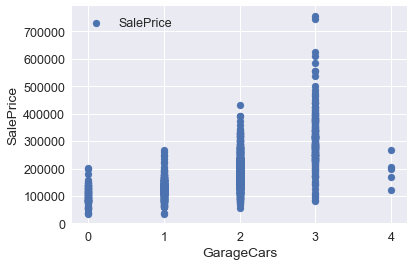

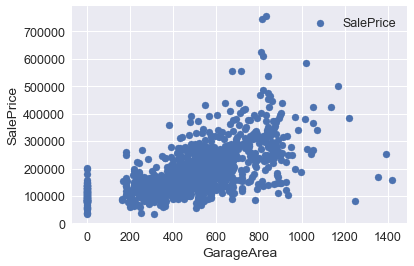

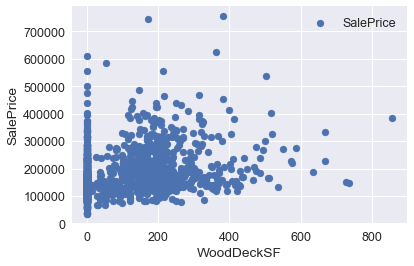

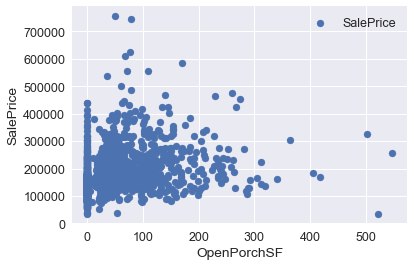

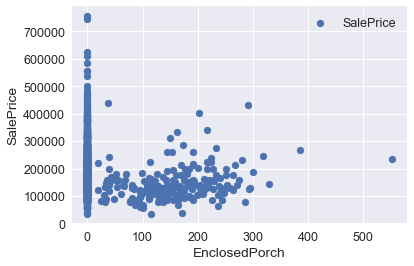

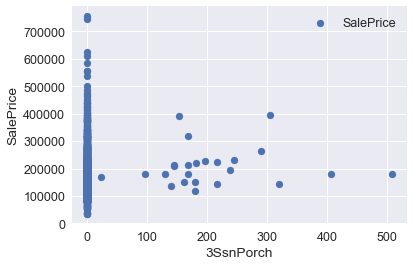

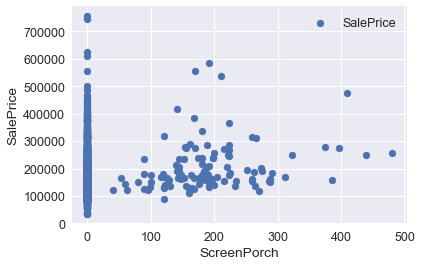

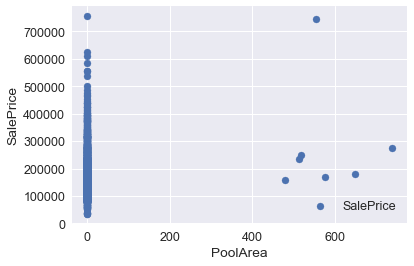

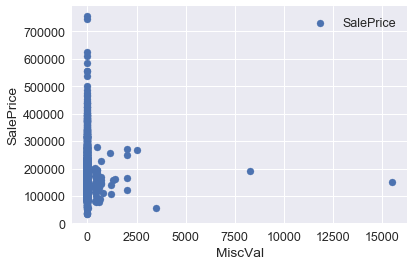

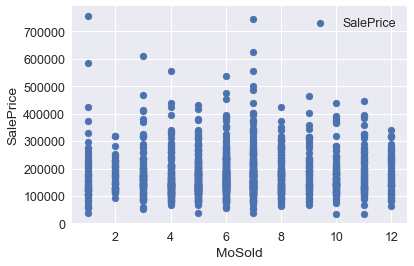

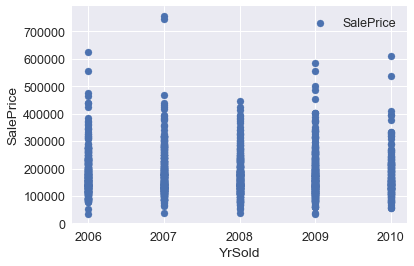

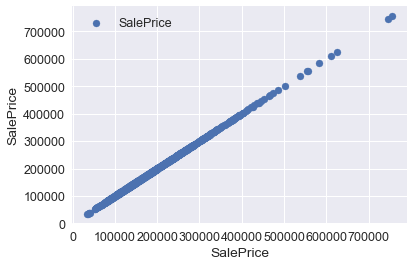

In [47]:
def numeric_corr(item):
        plt.scatter(train[item],train['SalePrice'])
        plt.xlabel(item)
        plt.ylabel("SalePrice")
        plt.legend()
        plt.show()
        
for item in train[extract_numerical_features(train)].columns:
    numeric_corr(item)   

In [48]:
var = 'GrLivArea'
data = pd.concat([y, X[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice')
data[data[var]>4500]

,SalePrice,GrLivArea
523,184750,4676
1298,160000,5642


In [49]:
var = 'TotalBsmtSF'
data = pd.concat([y, X[var]], axis=1)
data[data[var]>5000]

,SalePrice,TotalBsmtSF
1298,160000,6110.0


In [50]:
X = X.drop(data[data[var]>4500].index)
y = y.drop(data[data[var]>4500].index)

C:\Users\Shiming ZHOU\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


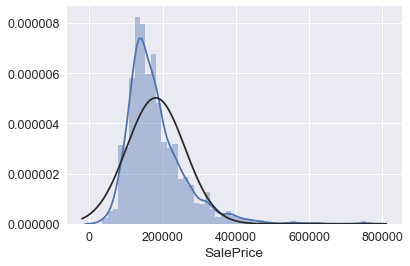

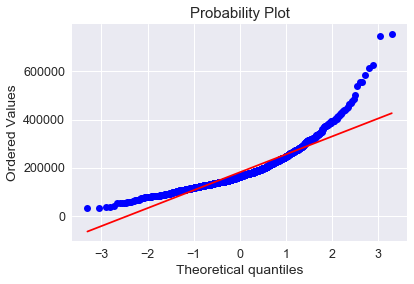

In [51]:
from scipy.stats import norm
from scipy import stats
sns.distplot(y, fit=norm);
fig = plt.figure()
res = stats.probplot(y, plot=plt)

C:\Users\Shiming ZHOU\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


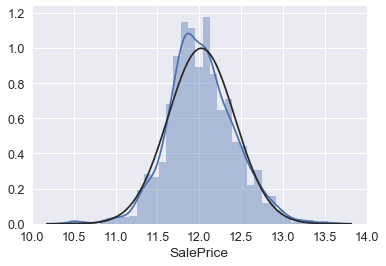

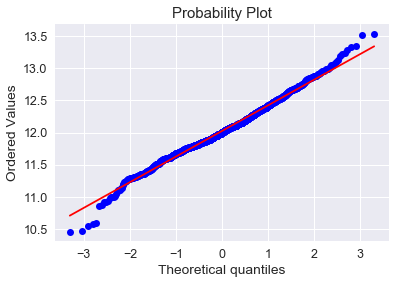

In [52]:
y = np.log(y)
sns.distplot(y, fit=norm)
fig = plt.figure()
res = stats.probplot(y, plot=plt)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
from math import sqrt
linreg = LinearRegression().fit(X_train, y_train)
preds = linreg.predict(X_test)
from sklearn.metrics import mean_squared_error
print("LinearRegression RMSE: %.4f" % sqrt(mean_squared_error((y_test),(preds))))

LinearRegression RMSE: 0.1257


In [74]:
from sklearn.svm import SVR
clf = SVR().fit(X_train, y_train)
preds = clf.predict(X_test)
print('the training score of SVC is {}'.format(clf.score(X_train,y_train)))
print('the test score of SVC is {}'.format(clf.score(X_test,y_test)))
print("SVM RMSE: %.4f" % sqrt(mean_squared_error((y_test),(preds))))

the training score of SVC is 0.9371029367872626
the test score of SVC is -0.0035493360422480524
SVM RMSE: 0.3897


In [57]:
import xgboost 
xgb = xgboost.XGBRegressor(n_estimators=2000, learning_rate=0.05, gamma=0.05, subsample=0.7,
                           colsample_bytree=1, max_depth=5)
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
from sklearn.metrics import mean_squared_error
print("XGBoost RMSE: %.4f" % (mean_squared_error((y_test),(preds)))**0.5)

XGBoost RMSE: 0.1225


In [35]:
category = [x for x in train.columns if (train[x].dtype == 'object') and (x in X.columns)]

In [36]:
category

['MSSubClass',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'PavedDrive',
 'SaleCondition']

In [87]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

params = {
     'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'num_leaves': 30,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
lgb_train = lgb.Dataset(X_train, y_train)#categorical_feature=category)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) # categorical_feature=category,
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=100)#categorical_feature=category,
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print("lightgbm RMSE: %.4f" % (mean_squared_error((y_test),(preds)))**0.5)

[1]	valid_0's rmse: 0.373243
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 0.357034
[3]	valid_0's rmse: 0.342712
[4]	valid_0's rmse: 0.328586
[5]	valid_0's rmse: 0.31532
[6]	valid_0's rmse: 0.303061
[7]	valid_0's rmse: 0.292131
[8]	valid_0's rmse: 0.281292
[9]	valid_0's rmse: 0.27146
[10]	valid_0's rmse: 0.262564
[11]	valid_0's rmse: 0.253505
[12]	valid_0's rmse: 0.245044
[13]	valid_0's rmse: 0.236945
[14]	valid_0's rmse: 0.229333
[15]	valid_0's rmse: 0.222086
[16]	valid_0's rmse: 0.215667
[17]	valid_0's rmse: 0.209542
[18]	valid_0's rmse: 0.20418
[19]	valid_0's rmse: 0.198785
[20]	valid_0's rmse: 0.193916
[21]	valid_0's rmse: 0.189105
[22]	valid_0's rmse: 0.18444
[23]	valid_0's rmse: 0.180179
[24]	valid_0's rmse: 0.176007
[25]	valid_0's rmse: 0.171626
[26]	valid_0's rmse: 0.168002
[27]	valid_0's rmse: 0.164693
[28]	valid_0's rmse: 0.161607
[29]	valid_0's rmse: 0.158644
[30]	valid_0's rmse: 0.15598
[31]	valid_0's rmse: 0.15335
[32]	valid_0's rmse: 0

In [78]:
answer = gbm.predict(test)
answer = np.exp(answer)

In [79]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = answer
sub.to_csv('../submission.csv',index=False)

In [103]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
preds = clf.predict(X_test)
print("FM RMSE: %.4f" % sqrt(mean_squared_error(y_test,preds)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.75
FM RMSE: 0.1944


In [104]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 200, random_state=0)
clf.fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
preds = clf.predict(X_test)
print("FM MSE: %.4f" % sqrt(mean_squared_error(y_test,preds)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.88
FM MSE: 0.1360
